### Point source extraction using all three weighting as CNN channels

In [1]:
import sys
import glob
import numpy as np

# Add pydeepkat directory
sys.path.insert(0,'../')
import pydeepkat as pk

import matplotlib.pylab as plt
from matplotlib import gridspec
from matplotlib.colors import LogNorm
%matplotlib inline

In [5]:
# "files_path" is list of robust 0 files, robust 1 and robust 2 images should be in same directory.
rb = 0
arch = 2
restore=0

patch_size = 400

def kernel1(cat):
    return pk.horn_kernel(cat,radius=15,step_height=2)
def kernel2(cat):
    return pk.gaussian_kernel(cat,sigma=10)

ppdp = pk.PreProcessDataProvider_3ch(files_path='../../data/24sep/train_set/*robust-'+str(rb)+'*.fits',
                                     nx=patch_size, ny=patch_size, 
                                     kernels=[kernel1,kernel2])

number of files:  3


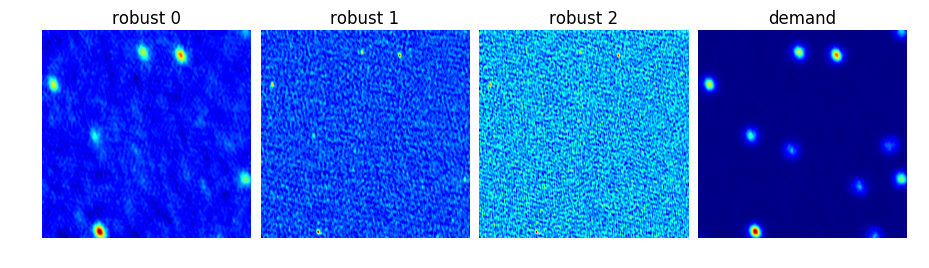

In [6]:
x,y = ppdp(1)

gs = gridspec.GridSpec(1, 4)
plt.figure(figsize=(9,3)) 

for ch in range(3):
    ax = plt.subplot(gs[0, ch])
    ax.imshow(x[0,:,:,ch])
    ax.set_title('robust '+str(ch))
    plt.axis('off')

ax = plt.subplot(gs[0, 3])
ax.imshow(y[0,:,:,0])
ax.set_title('demand')
plt.axis('off');

plt.subplots_adjust(wspace=0.05,bottom=0.0, top=0.92, left=0.02, right=0.98)

In [10]:
conv = pk.ConvolutionalLayers(nl=patch_size,learning_rate = 0.001,n_channel=3,
                              restore=1,model_add='./cmodel_3ch',arch_file_name='arch_3ch')

# conv.train(ppdp,training_epochs=5,n_s=1, dropout=0.2)

INFO:tensorflow:Restoring parameters from ./cmodel_3ch/model


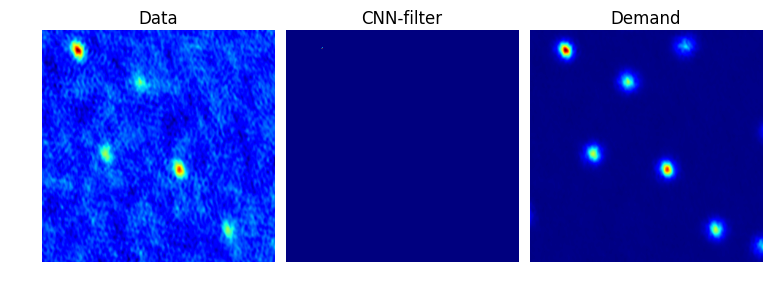

In [11]:
x,y = ppdp(1)
xf = conv.conv(x)

gs = gridspec.GridSpec(1, 3)
plt.figure(figsize=(7.5,3.5)) 

ax = plt.subplot(gs[0, 0])
plt.axis('off')
ax.set_title('Data')
ax.imshow(x[0,10:-10,10:-10,0])

ax = plt.subplot(gs[0, 1])
plt.axis('off')
ax.set_title('CNN-filter')
ax.imshow(xf[10:-10,10:-10])

ax = plt.subplot(gs[0, 2])
plt.axis('off')
ax.set_title('Demand')
ax.imshow(y[0,10:-10,10:-10,0])

plt.subplots_adjust(wspace=0.05,bottom=0.0, top=0.92, left=0.02, right=0.98)